In [48]:
import os, glob, pprint, math
import matplotlib.pyplot as plt
import numpy as np

In [8]:
path = os.getcwd()
if (path.endswith('code')):
    path = path[:-5]

In [56]:
data_path = f'{os.path.sep}data'

In [57]:
files = [f for f in glob.glob(f'{path}{data_path}/*.csv')]

In [58]:
def clean_word(word):
    return word.strip().lower()

def file_to_data(file_path):
    vocabulary_length = 0
    tokens = set()
    data_points = []
    with open(file_path, errors='ignore', encoding='utf-8') as file_obj:
        for line in file_obj:
            words = line.split(' ')
            for word in words:
                word = clean_word(word)
                if (word != None):
                    tokens.add(word)
                    vocabulary_length +=1
                    data_points.append([vocabulary_length, len(tokens)])
    return np.array(data_points)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


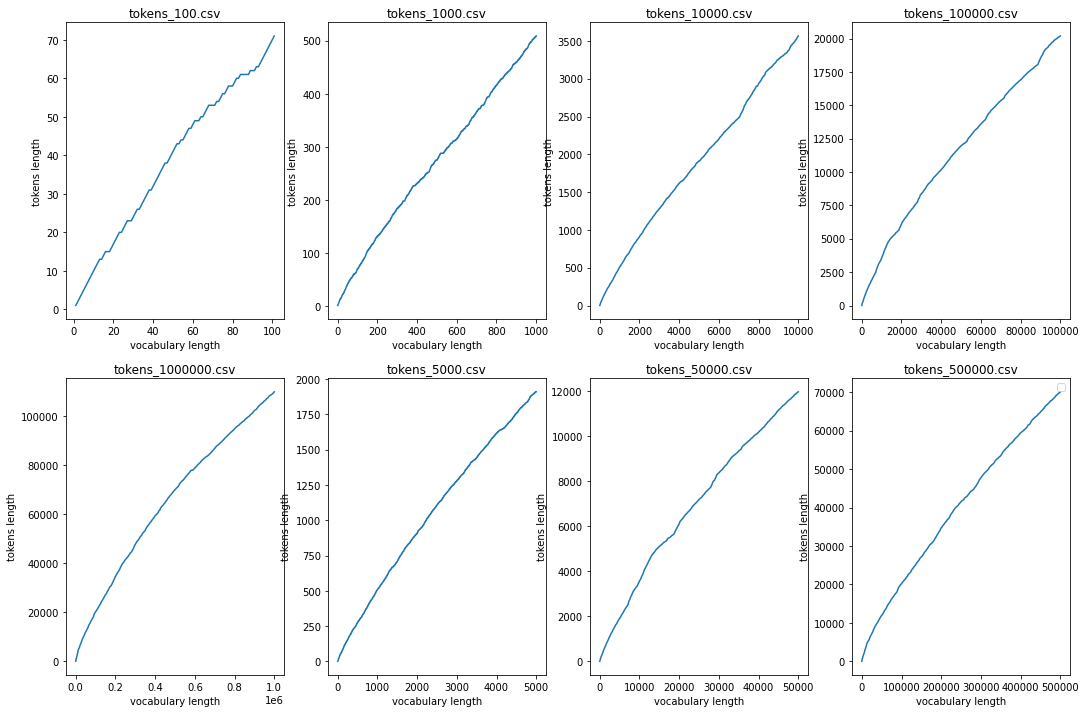

In [67]:
columns = 2
rows = math.ceil(len(files)/columns)
plt.subplots(figsize=(18, 12))
for index in range(len(files)):
    file = files[index]
    file_data = file_to_data(file)
    label = file.split(os.path.sep)[-1]
    plt.subplot(columns, rows, index+1)
    plt.plot(file_data[...,0], file_data[...,1])
    plt.title(label)
    plt.xlabel('vocabulary length')
    plt.ylabel('tokens length')
plt.show()